In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec

#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn import metrics


from google.colab import files

from mlxtend.preprocessing import TransactionEncoder

from mlxtend.frequent_patterns import association_rules


In [ ]:
#caricamento del dataset
df = pd.read_csv('words_glasgow.csv')
#faccio una copia del dataset in caso di manipolazione dati
dfcopy= df.copy()

#Preprocess

In [ ]:
df2 = df.copy()
#new variable 
df2["perceivability"] = df2[["imageability", "concreteness"]].mean(axis=1)

df_perc=df2.drop(["concreteness","imageability"], axis=1)

dfprepro= df_perc.copy()
#rename
dfprepro=dfprepro.rename(columns={"gender": "masculinity"})

df_missing=dfprepro.copy()

#dfprepro.loc[(dfprepro['web_corpus_freq'].isnull() == True), 'web_corpus_freq'] = dfprepro['web_corpus_freq'].mean()

#drop missing values
dfprepro=dfprepro.dropna()

dfprepro[dfprepro['web_corpus_freq'].isnull()]

dfprepro["web_corpus_log"] = pd.qcut(dfprepro["web_corpus_freq"], 10) 

#taglio la variabile web_corpus_freq in tot gruppi

dataframe = [dfprepro]

for dataset in dataframe:
    dataset.loc[(dataset["web_corpus_freq"] > 10000) & (dataset["web_corpus_freq"] <= 100000), "web_corpus_freq"] = 4
    dataset.loc[(dataset["web_corpus_freq"] > 100000) & (dataset["web_corpus_freq"] <= 1000000), "web_corpus_freq"] = 5
    dataset.loc[(dataset["web_corpus_freq"] > 1000000) & (dataset["web_corpus_freq"] <= 10000000), "web_corpus_freq"] = 6
    dataset.loc[(dataset["web_corpus_freq"] > 10000000) & (dataset["web_corpus_freq"] <= 100000000), "web_corpus_freq"] = 7
    dataset.loc[(dataset["web_corpus_freq"] > 100000000) & (dataset["web_corpus_freq"] <= 1000000000), "web_corpus_freq"] = 8
    dataset.loc[dataset["web_corpus_freq"] > 1000000000, "web_corpus_freq"] = 9
    
dfprepro = dfprepro.drop(["web_corpus_log","word"], axis=1)


#dfprepro.loc[(dfprepro['web_corpus_freq'].isnull() == True), 'web_corpus_freq'] = dfprepro['web_corpus_freq'].mean()
dfprepro.isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

length             0
arousal            0
valence            0
dominance          0
familiarity        0
aoa                0
semsize            0
masculinity        0
polysemy           0
web_corpus_freq    0
perceivability     0
dtype: int64

In [ ]:
df_pm= dfprepro.copy()
#normalization and scaling
var_to_scale=['length','aoa',"arousal","valence","dominance","familiarity","semsize","masculinity","perceivability"]

features = df_pm[var_to_scale]
scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)

#from 1 to 4
df_pm[var_to_scale] = 4*features
df_pm.head()
#round down
df_pm=df_pm.apply(np.floor)

df_pm['length'] = df_pm['length'].astype(str) + '_Lenght'
df_pm['arousal'] = df_pm['arousal'].astype(str) + '_Arousal'
df_pm['valence'] = df_pm['valence'].astype(str) + '_Valence'
df_pm['dominance'] = df_pm['dominance'].astype(str) + '_Dominance'
df_pm['familiarity'] = df_pm['familiarity'].astype(str) + '_Familiarity'
df_pm['aoa'] = df_pm['aoa'].astype(str) + '_Age_of_Acquisition'
df_pm['semsize'] = df_pm['semsize'].astype(str) + '_SemSize'
df_pm['masculinity'] = df_pm['masculinity'].astype(str) + '_Masculinity'
df_pm['web_corpus_freq'] = df_pm['web_corpus_freq'].astype(str) + '_Web_Corpus_Freq'
df_pm['perceivability'] = df_pm['perceivability'].astype(str) + '_Perceivability'


polysemy_dict = {0: 'Not Polysemy', 1: 'Polysemy'}
df_pm['polysemy'] = df_pm['polysemy'].map(polysemy_dict)

df_pm.head()

X = df_pm.values.tolist()
#create a dataframe without polysemy
df_no_pol=df_pm.drop('polysemy',axis=1)

X_no_pol = df_no_pol.values.tolist()

In [ ]:
#preprocess for mlxtend
te=TransactionEncoder()

te_ary=te.fit(X_no_pol).transform(X_no_pol)

df3=pd.DataFrame(te_ary,columns=te.columns_)

df3.head()

,0.0_Age_of_Acquisition,0.0_Arousal,0.0_Dominance,0.0_Familiarity,0.0_Lenght,0.0_Masculinity,0.0_Perceivability,0.0_SemSize,0.0_Valence,1.0_Age_of_Acquisition,1.0_Arousal,1.0_Dominance,1.0_Familiarity,1.0_Lenght,1.0_Masculinity,1.0_Perceivability,1.0_SemSize,1.0_Valence,2.0_Age_of_Acquisition,2.0_Arousal,2.0_Dominance,2.0_Familiarity,2.0_Lenght,2.0_Masculinity,2.0_Perceivability,2.0_SemSize,2.0_Valence,3.0_Age_of_Acquisition,3.0_Arousal,3.0_Dominance,3.0_Familiarity,3.0_Lenght,3.0_Masculinity,3.0_Perceivability,3.0_SemSize,3.0_Valence,4.0_Age_of_Acquisition,4.0_Arousal,4.0_Dominance,4.0_Familiarity,4.0_Lenght,4.0_Masculinity,4.0_Perceivability,4.0_Valence,4.0_Web_Corpus_Freq,5.0_Web_Corpus_Freq,6.0_Web_Corpus_Freq,7.0_Web_Corpus_Freq,8.0_Web_Corpus_Freq,9.0_Web_Corpus_Freq
0,False,False,False,True,False,False,False,False,True,False,True,True,False,True,False,False,False,False,False,False,False,False,False,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,True,False,False,True,False,False,False,False,False,False,True,True,False,True,False,False,False,True,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,True,True,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,True,True,True,True,False,False,False,True,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,True,True,True,False,False,False,False,True,False,False,False,False,True,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


# Frequent Itemsets

In [ ]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df3, min_support=0.065,use_colnames=True)

frequent_itemsets

,support,itemsets
0,0.164310,(0.0_Age_of_Acquisition)
1,0.167524,(0.0_Arousal)
2,0.073693,(0.0_Dominance)
3,0.384319,(0.0_Lenght)
4,0.153385,(0.0_Perceivability)
...,...,...
770,0.068766,"(3.0_Familiarity, 2.0_Valence, 2.0_Dominance, ..."
771,0.067909,"(3.0_Familiarity, 2.0_Valence, 2.0_Dominance, ..."
772,0.082048,"(3.0_Familiarity, 3.0_Perceivability, 2.0_Domi..."
773,0.076050,"(3.0_Familiarity, 2.0_Valence, 2.0_Dominance, ..."


# Association Rules

In [ ]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df3, min_support=0.065,use_colnames=True)
res = association_rules(frequent_itemsets, metric='confidence',min_threshold=0.75)
#export to dataframe
res1= res[['antecedents','consequents','support','confidence','lift']]
#cut at lift threshold
res2 = res1[res1['lift']>2.1]
#sort
df2=res2.sort_values(by =['consequents','lift'],ascending=(True,False),ignore_index=True )
#reindex
df2.index=df2.index+1
df2

,antecedents,consequents,support,confidence,lift
1,(0.0_SemSize),(3.0_Perceivability),0.077763,0.757829,2.446435
2,"(7.0_Web_Corpus_Freq, 0.0_Age_of_Acquisition)",(3.0_Familiarity),0.072622,0.933884,2.229858
3,"(2.0_Dominance, 0.0_Age_of_Acquisition)",(3.0_Familiarity),0.085261,0.904545,2.159805
4,"(0.0_Age_of_Acquisition, 1.0_Masculinity)",(3.0_Familiarity),0.074550,0.903896,2.158254
5,"(0.0_Lenght, 0.0_Age_of_Acquisition)",(3.0_Familiarity),0.100043,0.882798,2.107877


#Algoritmo di Citraro

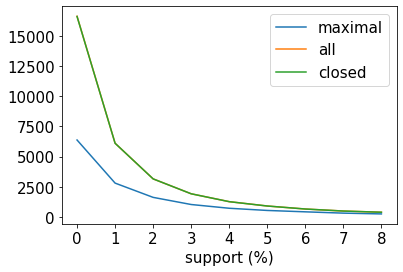

In [ ]:
!pip install pyfim
from fim import apriori
#how number of itemsets change with different supports and closed, maximal or all
len_max_it = []
len_cl_it = []
len_all_it = []
for i in range(1, 9+1):
    max_itemsets = apriori(X_no_pol, target='m', supp=i, zmin=1)
    cl_itemsets = apriori(X_no_pol, target='c', supp=i, zmin=1)
    all_itemsets = apriori(X_no_pol, target='s', supp=i, zmin=1)
    len_max_it.append( len(max_itemsets)  )
    len_cl_it.append( len(cl_itemsets) )
    len_all_it.append( len(all_itemsets) )
    
plt.plot(len_max_it, label='maximal')
plt.plot(len_all_it, label='all')

plt.plot(len_cl_it, label='closed')
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('support (%)', fontsize=15)

plt.show()

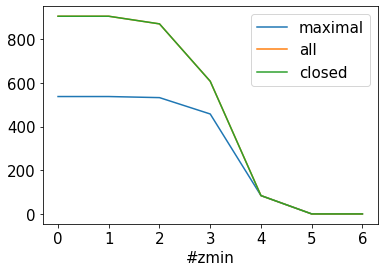

In [ ]:
!pip install pyfim
from fim import apriori
#how number of itemsets change with different zmin and closed, maximal or all

len_max_it = []
len_cl_it = []
len_all_it = []
for i in range(0, 6+1):
    max_itemsets = apriori(X_no_pol, target='m', supp=6, zmin=i)
    cl_itemsets = apriori(X_no_pol, target='c', supp=6, zmin=i)
    len_max_it.append( len(max_itemsets)  )
    len_cl_it.append( len(cl_itemsets) )

for i in range(0, 6+1):
    all_itemsets = apriori(X_no_pol, target='s', supp=6, zmin=i)
    len_all_it.append( len(all_itemsets) )

    
plt.plot(len_max_it, label='maximal')
plt.plot(len_all_it, label='all')
plt.plot(len_cl_it, label='closed')
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('#zmin', fontsize=15)

plt.show()

In [ ]:
!pip install pyfim
from fim import apriori
rules = apriori(X_no_pol, target='r', supp=6.5, zmin=1, conf=75, report='aScl')
len(rules)
#export to dataframe
df4 = pd.DataFrame(rules, columns=['target','antecedent','supp','supp (%)','conf','lift'])
columns_titles = ['antecedent','target','lift','conf','supp (%)','supp']
#reindex columns for better reading
df4=df4.reindex(columns=columns_titles)
#cut at thresholds
df4=df4.loc[df4['lift']>1.6]
df4=df4.loc[df4['supp (%)']>6.5]
#sorting
df4=df4.sort_values(by =['target','lift'],ascending=False,ignore_index=True )
#reindex rows
df4.index=df4.index+1
df4

,antecedent,target,lift,conf,supp (%),supp
1,"(0.0_SemSize,)",3.0_Perceivability,2.446435,0.757829,7.776350,363
2,"(0.0_Age_of_Acquisition, 7.0_Web_Corpus_Freq)",3.0_Familiarity,2.229858,0.933884,7.262211,339
3,"(0.0_Age_of_Acquisition, 2.0_Dominance)",3.0_Familiarity,2.159805,0.904545,8.526135,398
4,"(0.0_Age_of_Acquisition, 1.0_Masculinity)",3.0_Familiarity,2.158254,0.903896,7.455013,348
5,"(0.0_Age_of_Acquisition, 0.0_Lenght)",3.0_Familiarity,2.107877,0.882798,10.004284,467
6,"(0.0_Age_of_Acquisition,)",3.0_Familiarity,2.076417,0.869622,14.288775,667
7,"(0.0_Age_of_Acquisition, 2.0_Valence)",3.0_Familiarity,2.069697,0.866808,8.783205,410
8,"(0.0_Age_of_Acquisition, 3.0_Perceivability)",3.0_Familiarity,2.048136,0.857778,8.269066,386
9,"(0.0_Age_of_Acquisition, 1.0_Arousal)",3.0_Familiarity,2.034700,0.852151,6.790917,317
10,"(3.0_Perceivability, 2.0_Dominance, 1.0_Arousal)",2.0_Valence,1.773474,0.897375,8.054841,376


In [ ]:
df4=df4.round(2)

print(df4.to_latex())

\begin{tabular}{lllrrrr}
\toprule
{} &                                         antecedent &           target &  lift &  conf &  supp (\%) &  supp \\
\midrule
1  &      (0.0\_Age\_of\_Acquisition, 7.0\_Web\_Corpus\_Freq) &  3.0\_Familiarity &  2.23 &  0.93 &      7.26 &   339 \\
2  &            (0.0\_Age\_of\_Acquisition, 2.0\_Dominance) &  3.0\_Familiarity &  2.16 &  0.90 &      8.53 &   398 \\
3  &          (0.0\_Age\_of\_Acquisition, 1.0\_Masculinity) &  3.0\_Familiarity &  2.16 &  0.90 &      7.46 &   348 \\
4  &               (0.0\_Age\_of\_Acquisition, 0.0\_Lenght) &  3.0\_Familiarity &  2.11 &  0.88 &     10.00 &   467 \\
5  &                          (0.0\_Age\_of\_Acquisition,) &  3.0\_Familiarity &  2.08 &  0.87 &     14.29 &   667 \\
6  &              (0.0\_Age\_of\_Acquisition, 2.0\_Valence) &  3.0\_Familiarity &  2.07 &  0.87 &      8.78 &   410 \\
7  &       (0.0\_Age\_of\_Acquisition, 3.0\_Perceivability) &  3.0\_Familiarity &  2.05 &  0.86 &      8.27 &   386 \\
8  &    

In [ ]:
df_Familiarity=df4.loc[df4['target']=='3.0_Familiarity']
df_Familiarity

,antecedent,target,lift,conf,supp (%),supp
1,"(0.0_Age_of_Acquisition, 7.0_Web_Corpus_Freq)",3.0_Familiarity,2.23,0.93,7.26,339
2,"(0.0_Age_of_Acquisition, 2.0_Dominance)",3.0_Familiarity,2.16,0.90,8.53,398
3,"(0.0_Age_of_Acquisition, 1.0_Masculinity)",3.0_Familiarity,2.16,0.90,7.46,348
4,"(0.0_Age_of_Acquisition, 0.0_Lenght)",3.0_Familiarity,2.11,0.88,10.00,467
5,"(0.0_Age_of_Acquisition,)",3.0_Familiarity,2.08,0.87,14.29,667
6,"(0.0_Age_of_Acquisition, 2.0_Valence)",3.0_Familiarity,2.07,0.87,8.78,410
7,"(0.0_Age_of_Acquisition, 3.0_Perceivability)",3.0_Familiarity,2.05,0.86,8.27,386
8,"(0.0_Age_of_Acquisition, 1.0_Arousal)",3.0_Familiarity,2.03,0.85,6.79,317


In [ ]:
df_Valence=df4.loc[df4['target']=='2.0_Valence']
df_Valence

,antecedent,target,lift,conf,supp (%),supp
9,"(3.0_Perceivability, 2.0_Dominance, 1.0_Arousal)",2.0_Valence,1.77,0.90,8.05,376
10,"(7.0_Web_Corpus_Freq, 2.0_Dominance, 1.0_Arousal)",2.0_Valence,1.74,0.88,6.75,315


In [ ]:
df_Dominance=df4.loc[df4['target']=='2.0_Dominance']
df_Dominance

,antecedent,target,lift,conf,supp (%),supp


## Replacing missing values

In [ ]:
df_only_missing=df_missing[df_missing['web_corpus_freq'].isnull()]
df_temp=df_only_missing.copy()

In [ ]:
#scale (come sopra)
var_to_scale=['length','aoa',"arousal","valence","dominance","familiarity","semsize","masculinity","perceivability"]

features = df_only_missing[var_to_scale]
scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)


df_only_missing[var_to_scale] = 4*features
df_only_missing.head()

df_only_missing=df_only_missing[var_to_scale].apply(np.floor)

#df_only_missing=df_only_missing.drop(labels='web_corpus_freq',axis=1)

df_only_missing['length'] = df_only_missing['length'].astype(str) + '_Lenght'
df_only_missing['arousal'] = df_only_missing['arousal'].astype(str) + '_Arousal'
df_only_missing['valence'] = df_only_missing['valence'].astype(str) + '_Valence'
df_only_missing['dominance'] = df_only_missing['dominance'].astype(str) + '_Dominance'
df_only_missing['familiarity'] = df_only_missing['familiarity'].astype(str) + '_Familiarity'
df_only_missing['aoa'] = df_only_missing['aoa'].astype(str) + '_Age_of_Acquisition'
df_only_missing['semsize'] = df_only_missing['semsize'].astype(str) + '_SemSize'
df_only_missing['masculinity'] = df_only_missing['masculinity'].astype(str) + '_Masculinity'
#df_only_missing['web_corpus_freq'] = df_only_missing['web_corpus_freq'].astype(str) + '_Web_Corpus_Freq'
df_only_missing['perceivability'] = df_only_missing['perceivability'].astype(str) + '_Perceivability'

#you need to know wich word you are working with
df_only_missing['word'] = df_temp['word']


X_miss = df_only_missing.values.tolist()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [ ]:
rules = apriori(X_no_pol, target='r', supp=4, zmin=2, conf=60, report='aScl')

#export found rules to dataframe
df4 = pd.DataFrame(rules, columns=['target','antecedents','supp','supp (%)','conf','lift'])
#reindex columns
columns_titles = ['antecedents','target','lift','conf','supp (%)','supp']
df4=df4.reindex(columns=columns_titles)
#cuts
df4=df4.loc[df4['supp (%)']>2]

#which one are Web Coprus Freq?
df_web4=df4.loc[(df4['target']=='4.0_Web_Corpus_Freq')] 
df_web5=df4.loc[(df4['target']=='5.0_Web_Corpus_Freq')] 
df_web6=df4.loc[(df4['target']=='6.0_Web_Corpus_Freq')] 
df_web7=df4.loc[(df4['target']=='7.0_Web_Corpus_Freq')] 
df_web8=df4.loc[(df4['target']=='8.0_Web_Corpus_Freq')] 
df_web9=df4.loc[(df4['target']=='9.0_Web_Corpus_Freq')]
#sort and reindex
df4=df4.sort_values(by =['target','lift'],ascending=False,ignore_index=True )
df4.index=df4.index+1
df4

,antecedents,target,lift,conf,supp (%),supp
1,"(0.0_Age_of_Acquisition, 1.0_SemSize, 0.0_Leng...",7.0_Web_Corpus_Freq,1.933989,0.604061,2.549272,119
2,"(1.0_Valence, 2.0_Familiarity, 1.0_Dominance, ...",6.0_Web_Corpus_Freq,1.456893,0.662281,3.234790,151
3,"(1.0_Valence, 1.0_SemSize, 2.0_Familiarity)",6.0_Web_Corpus_Freq,1.441893,0.655462,3.341902,156
4,"(2.0_Arousal, 2.0_Age_of_Acquisition, 2.0_Fami...",6.0_Web_Corpus_Freq,1.433585,0.651685,3.727506,174
5,"(1.0_Valence, 0.0_Lenght, 2.0_Familiarity)",6.0_Web_Corpus_Freq,1.430371,0.650224,3.106255,145
...,...,...,...,...,...,...
2113,"(1.0_Masculinity, 0.0_Lenght, 3.0_Familiarity,...",0.0_Age_of_Acquisition,3.716481,0.610656,3.191945,149
2114,"(3.0_Perceivability, 7.0_Web_Corpus_Freq, 3.0_...",0.0_Age_of_Acquisition,3.708686,0.609375,3.341902,156
2115,"(7.0_Web_Corpus_Freq, 0.0_Lenght, 3.0_Familiar...",0.0_Age_of_Acquisition,3.675974,0.604000,3.234790,151
2116,"(3.0_Perceivability, 7.0_Web_Corpus_Freq, 3.0_...",0.0_Age_of_Acquisition,3.673561,0.603604,4.305913,201


In [ ]:
df_web4

,antecedents,target,lift,conf,supp (%),supp


In [ ]:
df_web5

,antecedents,target,lift,conf,supp (%),supp


In [ ]:
df_web6=df_web6.loc[df_web6['lift']>1.3]
df6=df_web6.loc[74]
df6

antecedents    (0.0_SemSize, 1.0_Age_of_Acquisition)
target                           6.0_Web_Corpus_Freq
lift                                         1.33803
conf                                        0.608247
supp (%)                                     2.52785
supp                                             118
Name: 74, dtype: object

In [ ]:
print(df6.to_latex())

\begin{tabular}{ll}
\toprule
{} &                                     74 \\
\midrule
antecedents &  (0.0\_SemSize, 1.0\_Age\_of\_Acquisition) \\
target      &                    6.0\_Web\_Corpus\_Freq \\
lift        &                                1.33803 \\
conf        &                               0.608247 \\
supp (\%)    &                                2.52785 \\
supp        &                                    118 \\
\bottomrule
\end{tabular}



In [ ]:
df_web7

,antecedents,target,lift,conf,supp (%),supp
518,"(0.0_Age_of_Acquisition, 1.0_SemSize, 0.0_Leng...",7.0_Web_Corpus_Freq,1.933989,0.604061,2.549272,119


In [ ]:
df_web8

,antecedents,target,lift,conf,supp (%),supp


In [ ]:
df_web9

,antecedents,target,lift,conf,supp (%),supp


In [ ]:
#store rules in a dictionary
ant_tup=[]
web_tup=[]

for i in range(len(rules)):
    if (rules[i][0]=='4.0_Web_Corpus_Freq' or 
        rules[i][0]=='5.0_Web_Corpus_Freq' or 
        rules[i][0]=='6.0_Web_Corpus_Freq' or 
        rules[i][0]=='7.0_Web_Corpus_Freq' or
        rules[i][0]=='8.0_Web_Corpus_Freq' or
        rules[i][0]=='9.0_Web_Corpus_Freq'):
      if len(rules[i][1])>1: #this ones are cuts at min thresholds (apriori dont work well)
        if rules[i][5]>1.3:
          ant_tup.append(rules[i][1])
          web_tup.append(rules[i][0])

ant_list = [list(ele) for ele in ant_tup]
web_list = [list(ele) for ele in web_tup]

print(ant_list)

#create dictionary between antecedents and Web Corpus Value that they imply
zip_iterator = zip(ant_tup, web_tup)
a_dictionary = dict(zip_iterator)

print(a_dictionary)

[['0.0_SemSize', '1.0_Age_of_Acquisition'], ['0.0_SemSize', '2.0_Familiarity'], ['3.0_Valence', '2.0_Familiarity'], ['0.0_Age_of_Acquisition', '1.0_SemSize', '0.0_Lenght', '3.0_Familiarity'], ['1.0_Valence', '1.0_SemSize', '2.0_Familiarity'], ['1.0_Valence', '0.0_Lenght', '2.0_Familiarity'], ['1.0_Valence', '2.0_Familiarity', '1.0_Dominance', '2.0_Masculinity'], ['1.0_Valence', '2.0_Familiarity', '1.0_Dominance'], ['1.0_Valence', '2.0_Familiarity', '2.0_Masculinity'], ['1.0_Valence', '2.0_Familiarity', '1.0_Lenght'], ['1.0_Valence', '2.0_Familiarity'], ['2.0_Arousal', '1.0_Perceivability', '2.0_Familiarity'], ['2.0_Arousal', '2.0_Age_of_Acquisition', '2.0_Familiarity'], ['2.0_Arousal', '2.0_Familiarity', '2.0_SemSize', '1.0_Lenght'], ['2.0_Arousal', '2.0_Familiarity', '2.0_SemSize'], ['2.0_Arousal', '2.0_Familiarity', '2.0_Dominance'], ['2.0_Arousal', '2.0_Familiarity', '2.0_Valence'], ['2.0_Arousal', '2.0_Familiarity', '2.0_Masculinity'], ['2.0_Arousal', '2.0_Familiarity', '1.0_Lenght

In [ ]:
from collections import Counter


list_of_tuples= []
#per ogni regola trovata con questi tagli
for i in range(len(ant_list)):
  ru=ant_list[i] #prendo in considerazione gli antecedenti della regola i
  for j in range(len(X_miss)):
    mi=X_miss[j] #e i valori delle variabili del missing value j
    confront=[k for k in mi if k in ru] #interesezione fra mi e ru
    #sorting
    confront.sort()
    ru.sort()

    #se l'intersezione fra mi e ru corrisponde con ru 
    #allora quella regola riguarda quel missing value 
    if confront==ru:
      confront=tuple(confront)
      #trovami il valore di Web Corpus che implicava quella regola
      value=a_dictionary.get(confront)
      #se sta nel dizionario
      if value!=None:
        #dimmi che parola è
        word=mi[-1]
        #creo tupla con parola di riferimento e valore di Web Corpus
        new_tuple=(word,value)
        #fammi una lista con parola e regola
        list_of_tuples.append(new_tuple)
        #stampami anche gli antecedenti
        print(confront)
        #contami quante sono le regola trovate che riguardano i miei missing values
Counter(list_of_tuples)

        #print("\n word:",mi[-1],value,"\n \n rule:",confront)

('0.0_SemSize', '1.0_Age_of_Acquisition')


Counter({('yo-yo', '6.0_Web_Corpus_Freq'): 1})

In [ ]:
#puoi fare la stessa cosa di sopra col dataframe, ma è più tricky e c'è qualche bug
te_ary_rules=te.fit(ant_list).transform(ant_list)

df_rules_encoded=pd.DataFrame(te_ary_rules,columns=te.columns_)

df_rules_missing=pd.DataFrame()
column_names_miss=list(df_miss_encoded.columns.values)


#col_names=[list(ele) for ele in row (df == 'True').idxmax(axis=1)[row])]
for row in range(len(df_rules_encoded)):
  col_names=df_rules_encoded.columns[(df_rules_encoded == True).iloc[row]].values.tolist()
  column_names=list(set(column_names_miss).intersection(col_names))
  #col_names=(df == 'True').idxmax(axis=1)[row]
  #col_names=df_rules_encoded.apply(lambda row: row[row == 'True'].index, axis=1)
  #col_name=get_col_name(row)
  for row1 in range(len(df_miss_encoded)):
    temp=df_miss_encoded.columns[(df_miss_encoded == True).iloc[row1]].values.tolist()
    confront=list(set(temp).intersection(column_names))
    confront.sort()
    column_names.sort()

    if confront == column_names:
      confront=tuple(confront)
      #print(list(map(a_dictionary.get, confront)), temp[-1])
      print("\n word:",temp[-1],a_dictionary.get(confront),"\n \n rule:",confront)
    #df_miss_encoded[df_miss_encoded.loc[row1,column_names]


#df_rules_missing=pd.merge(df_miss_encoded, df_rules_encoded, on = column_names, how='inner')
#print(df_rules_missing.columns[(df_rules_missing == True).iloc[row]].values.tolist())
#df_rules_missing